In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.layers import Dense, Input,LSTM,Concatenate
from keras.optimizers import Adam
from keras.models import Sequential
from sklearn.metrics import r2_score, mean_squared_error
from numpy import mean, std, absolute
#Note: Use cross validation
#, split data different test and train Random_state=None
#(validation - small dataset)) Done

In [2]:
seq= pd.read_csv('Data.csv').values #data
seq = np.array(seq)
seq

array([[188.0, 78.4, 32, 'M', 17.58022, 163.5, 44.8475],
       [175.0, 59.0, 22, 'F', 14.23946939, 189.4, 48.26938776],
       [170.0, 58.1, 23, 'F', 12.08142149, 162.7, 41.58837],
       [168.5, 54.0, 30, 'F', 12.1644882, 182.3, 45.05366],
       [191.0, 98.6, 30, 'M', 19.5721, 198.5374064, 39.7],
       [178.0, 63.0, 26, 'F', 13.34187855, 154.3, 42.35517],
       [176.7, 82.0, 27, 'M', 16.0798105, 199.8, 39.21905],
       [177.4, 66.3, 29, 'F', 14.25017724, 151.2, 42.986959999999996],
       [162.6, 57.3, 25, 'F', 11.78905385, 173.35402130000003, 41.14853],
       [178.0, 89.2, 27, 'M', 19.16277073, 186.5641757, 42.96585366],
       [174.0, 67.5, 22, 'F', 12.91275, 168.46162980000003, 38.26],
       [179.8, 73.9, 29, 'M', 15.81077937, 156.57106069999998, 42.78966],
       [179.0, 79.0, 29, 'M', 16.50274845, 190.9, 41.779109999999996],
       [168.8, 78.3, 23, 'F', 13.01552712, 175.84343909999998, 33.24528],
       [175.1, 72.4, 29, 'F', 17.75458552, 188.66200569999998, 45.29231],
  

In [3]:
# Assigning numerical values and storing in another column (Column Gender) 1 - Males, 0 - Females
labelencoder = LabelEncoder() 
seq[:,3] = np.array(labelencoder.fit_transform(seq[:,3]))

In [4]:
# Input1 (EE, HRmax) Time series data
X1 = seq[:, 4:6]
X1 = np.asarray(X1).astype(np.float32)
X1 = X1.reshape((len(X1), 2, 1)) # Input 2 reshaped for LSTM 
# Input2 (Height, Age, Weight, Gender) and Output (VO2max)
X, y = seq[:, 0:4], seq[:, 6] 
X = np.asarray(X).astype(np.float32)
y = np.asarray(y).astype(np.float32)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1) # splits data randomly everytime
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size = 0.33, random_state = 1) # splits data randomly everytime 

In [6]:
Input1 = Input(shape = (2,1)) #for time-series Input 1
Input2 = Input(shape = (4,)) # for static Input 2

In [7]:
# left head Input 1 (x) Time series HR, EE
lstm1 = LSTM(32,activation='elu', return_sequences = True)(Input1)
lstm2=LSTM(16,activation='elu')(lstm1)
x = tf.keras.Model(inputs=Input1, outputs=lstm2)

In [8]:
# right head Input2 (y) 
dense1 = Dense(32 , kernel_initializer='normal', activation = 'elu')(Input2)
dense2 = Dense(16, activation= 'elu', kernel_initializer='normal')(dense1)
y = tf.keras.Model(inputs=Input2, outputs=dense2)

In [9]:
# united Concatenate output of both heads
united = tf.keras.layers.Concatenate()([x.output, y.output])

In [10]:
dense3 = Dense(2, activation='elu')(united)
z = Dense(1, activation="linear")(dense3)

In [11]:
model = tf.keras.Model(inputs=[x.input, y.input], outputs=z)
opt=Adam(learning_rate=0.02) # learning rate =0.02


In [19]:
# define model
model.compile(optimizer = opt, loss = 'mean_squared_logarithmic_error')
model.fit([X1_train,X_train], y_train, epochs = 2500, batch_size=17, validation_data=([X1_test,X_test], y_test))

Epoch 1/2500
1/1 [==============================] - 0s 253ms/step - loss: 0.0038 - val_loss: 0.0113
Epoch 2/2500
1/1 [==============================] - 0s 20ms/step - loss: 0.0038 - val_loss: 0.0113
Epoch 3/2500
1/1 [==============================] - 0s 17ms/step - loss: 0.0038 - val_loss: 0.0113
Epoch 4/2500
1/1 [==============================] - 0s 19ms/step - loss: 0.0038 - val_loss: 0.0113
Epoch 5/2500
1/1 [==============================] - 0s 19ms/step - loss: 0.0038 - val_loss: 0.0113
Epoch 6/2500
1/1 [==============================] - 0s 17ms/step - loss: 0.0038 - val_loss: 0.0113
Epoch 7/2500
1/1 [==============================] - 0s 22ms/step - loss: 0.0038 - val_loss: 0.0113
Epoch 8/2500
1/1 [==============================] - 0s 17ms/step - loss: 0.0038 - val_loss: 0.0113
Epoch 9/2500
1/1 [==============================] - 0s 18ms/step - loss: 0.0038 - val_loss: 0.0113
Epoch 10/2500
1/1 [==============================] - 0s 18ms/step - loss: 0.0038 - val_loss: 0.0113
Epoch 11

1/1 [==============================] - 0s 17ms/step - loss: 0.0038 - val_loss: 0.0113
Epoch 84/2500
1/1 [==============================] - 0s 17ms/step - loss: 0.0038 - val_loss: 0.0113
Epoch 85/2500
1/1 [==============================] - 0s 17ms/step - loss: 0.0038 - val_loss: 0.0113
Epoch 86/2500
1/1 [==============================] - 0s 17ms/step - loss: 0.0038 - val_loss: 0.0113
Epoch 87/2500
1/1 [==============================] - 0s 17ms/step - loss: 0.0038 - val_loss: 0.0113
Epoch 88/2500
1/1 [==============================] - 0s 16ms/step - loss: 0.0038 - val_loss: 0.0113
Epoch 89/2500
1/1 [==============================] - 0s 15ms/step - loss: 0.0038 - val_loss: 0.0113
Epoch 90/2500
1/1 [==============================] - 0s 15ms/step - loss: 0.0038 - val_loss: 0.0113
Epoch 91/2500
1/1 [==============================] - 0s 19ms/step - loss: 0.0038 - val_loss: 0.0113
Epoch 92/2500
1/1 [==============================] - 0s 15ms/step - loss: 0.0038 - val_loss: 0.0113
Epoch 93/2500


KeyboardInterrupt: 

In [13]:
# make predictions
yhat = model.predict([X1_test, X_test])
print(yhat)

[[41.856583]
 [41.856583]
 [41.856583]
 [41.856583]
 [41.856583]
 [41.856583]]


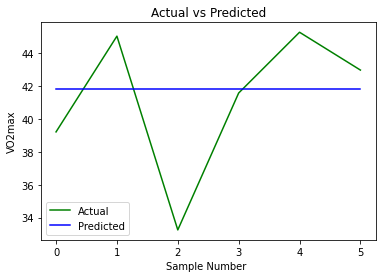

In [14]:
#Visualising the Actual and predicted Result
plt.plot(y_test, color = 'green', label = 'Actual')
plt.plot(yhat, color = 'blue', label = 'Predicted')
plt.xlabel('Sample Number ')
plt.ylabel('VO2max')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [15]:
print("mean squared error: ", mean_squared_error(y_test, yhat)) #compute MSE
print("r_square score: ", r2_score(y_test, yhat)) # compute R2 score (accuracy for regression tasks or continuous data)

mean squared error:  17.414385
r_square score:  -0.022994203364926857


In [16]:
train_error =  np.abs(y_test - yhat)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)
print("std_error: ",std_error)
print("mean_error: ",mean_error)
print("min_error: ",min_error)
print("max_error: ",max_error)

std_error:  2.6624477
mean_error:  3.213371
min_error:  0.26821136
max_error:  8.611301
